# Assignment 6

### 1.复现代码

Basic of TF 2.0

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
/
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x  #gpu
except Exception:
  pass
import tensorflow as tf

import cProfile

/home/ma-user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [29]:
tf.__version__

'2.0.0'

In [6]:
tf.executing_eagerly()


True

In [7]:
x = [[2.]]
m = tf.matmul(x,x)
print("x matmul x = {}".format(m))

x matmul x = [[4.]]


In [8]:
a = tf.constant([[1,2],
                 [3,4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [9]:
#Broadcasting 
b = tf.add(a,1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [10]:
#element-wise multiplication
print(a*b)  

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [11]:
print(tf.matmul(a,b))

tf.Tensor(
[[10 13]
 [22 29]], shape=(2, 2), dtype=int32)


In [12]:
import numpy as np
c = np.multiply(a,b)
print(c)

[[ 2  6]
 [12 20]]


In [13]:
#Transfer a tensor to numpy array
print(a.numpy())

[[1 2]
 [3 4]]


### Computing gradients

In [14]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss = w * w
grad = tape.gradient(loss,w)
print(grad)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


### Train a model

In [15]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:1000,:,:]
y_test = y_test[:1000]

In [16]:
x_train = tf.cast(x_train[...,tf.newaxis]/255, tf.float32),
x_test = tf.cast(x_test[...,tf.newaxis]/255, tf.float32),

#y_train = y_train.astype('float32')
#y_test = y_test.astype('float32')
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [17]:
#Build the model using Sequential

mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,[3,3],activation='relu',
                          input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [18]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [30]:
#Build the model using Model
inputs = tf.keras.Input(shape=(None,None,1),name="digits")
conv_1 = tf.keras.layers.Conv2D(16,[3,3],activation="relu")(inputs)
conv_2 = tf.keras.layers.Conv2D(16,[3,3],activation="relu")(conv_1)
ave_pool = tf.keras.layers.GlobalAveragePooling2D()(conv_2)
outputs = tf.keras.layers.Dense(10)(ave_pool)
mnist_model_2 = tf.keras.Model(inputs=inputs,outputs=outputs)#it starts to build when the input and output are set up

In [31]:
mnist_model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, None, None, 1)]   0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 16)    160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
global_average_pooling2d_1 ( (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 2,650
Trainable params: 2,650
Non-trainable params: 0
_________________________________________________________________


### Two training methods

In [32]:
mnist_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics = ["accuracy"])

In [33]:
mnist_model_2.compile(loss = tf.keras.losses.categorical_crossentropy,
                      optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [34]:
mnist_model.fit(x_train,y_train,batch_size=128,epochs=3,validation_split=0.1,shuffle=True)

Train on 9000 samples, validate on 1000 samples
Epoch 1/3
9000/9000 [==============================] - 8s 922us/sample - loss: 2.2668 - accuracy: 0.1807 - val_loss: 2.2515 - val_accuracy: 0.3330
Epoch 2/3
9000/9000 [==============================] - 8s 841us/sample - loss: 2.2574 - accuracy: 0.2026 - val_loss: 2.2365 - val_accuracy: 0.4110
Epoch 3/3
9000/9000 [==============================] - 8s 842us/sample - loss: 2.2389 - accuracy: 0.2467 - val_loss: 2.2184 - val_accuracy: 0.4680


In [ ]:
mnist_model.evaluate(x_test,y_test)

### Use TF 2.0 

In [37]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:1000,:,:]
y_test = y_test[:1000]

In [38]:
dataset = tf.data.Dataset.from_tensor_slices(
(tf.cast(x_train[...,tf.newaxis]/255, tf.float32),
 tf.cast(y_train,tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

In [39]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_history = []

In [40]:
for epoch in range(5):
    
    for (batch, (images,labels)) in enumerate (dataset):
        
        with tf.GradientTape() as tape:
            
            logits = mnist_model(images,training=True)
            loss_value = loss(labels,logits)
            
        grads = tape.gradient(loss_value,mnist_model.trainable_variables)
        optimizer.apply_gradients(zip(grads,mnist_model.trainable_variables))
        
    print("Epoch {} finishted".format(epoch))

Epoch 0 finishted
Epoch 1 finishted
Epoch 2 finishted
Epoch 3 finishted
Epoch 4 finishted


### 2.回答以下理论题目?

#### 1. Compared to FNN, what is the biggest advantage of CNN?
和FNN比，CNN使用了卷积核。卷积核有参数共享特点。
参数共享两个好处：

1、卷积学习显著减少了需要学习的参数数量；
2、共享的卷积核具有平移不变性，即因为参数共享，无论目标图像在图片中的哪个位置，卷积核都能扫描到它。

#### 2. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 
(5 * 5+1) * 50 = 1300

#### 3. What are "local invariant" and "parameter sharing" ?
local invariant：平移不变性。由于参数共享，用到的feature map是一致的，所以搜索目标的结果是一样的，这就是平移不变性。
parameter sharing：参数共享。深度网络中参数多是事实，减少参数是刚需。在全连接网络中，样本参数全部作为输入，所以参数非常多。RNN的卷积核会对上一层的所有数据都计算一遍，一个卷积核在计算时会被使用多次，这就是共享，从而减少参数。

#### 4. Why we use batch normalization ?
batch normalization可以翻译为批量标准化。激活函数，比如sigmoid，relu等，都是在0附近梯度较大；而在远离0的范围时，梯度趋向于0，此时进行梯度下降计算时收敛效果不好。
所以我们需要在使用激活函数前对上一层的输出数据做处理，将数据转化成在[0,1]区间内，这样就可以落在激活函数梯度较大的范围，易收敛。

#### 5. What problem does dropout try to solve ?
dropout是指在深度学习网络的训练过程中，对于神经网络单元，按照一定的概率将其暂时从网络中丢弃。
它要解决过拟合问题。对于随机梯度下降来说，由于是随机丢弃，故而每一个mini-batch都在训练不同的网络。可以避免对特定的w权值过分依赖，以此减少过拟合的问题。

#### 6.  Is the following statement correct and why ? "Because pooling layers do not have parameters, they do not affect  the backpropagation(derivatives) calculation"
错。因为他们会影响到反向传播。

首先，pooling层(池化层)的输入一般来源于上一个卷积层,pooling的窗大小为n* n。主要有以下几个作用：
1. 保留主要的特征,同时减少下一层的参数和计算量，防止过拟合；
2. 保持某种不变性，包括translation(平移)，rotation(旋转)，scale(尺度),常用的有mean-pooling和max-pooling。
由正向传播可知，反向时，mean pooling是把梯度平均传递到前一层，也就是一个值分成n等分向前传；

max pooling是把梯度传播到max值对应的元素，其余元素得到的梯度为0。也就是此时只关注最大值，所以将残差传递到该最大值的位置，区域内其他n* n-1个位置置零。



### 3. 实践题

#### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt

Load the dataset. 

In [42]:
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 16s 0us/step


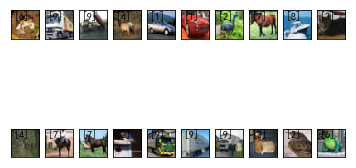

In [43]:
for i in range(1,21):
    plt.subplot(2,10,i)
    plt.imshow(X_train[i-1])
    plt.text(3,10,str(Y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [45]:
#数据预处理
nb_classes=10
(X_train, Y_train), (X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
#将Y_train的shape由一列，变为一行
Y_train=tf.keras.utils.to_categorical(Y_train,nb_classes)#一种编码方式，one-hot编码，比如第二个类别就是第二个数是1，其他都是0
Y_test =tf.keras.utils.to_categorical(Y_test ,nb_classes)

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

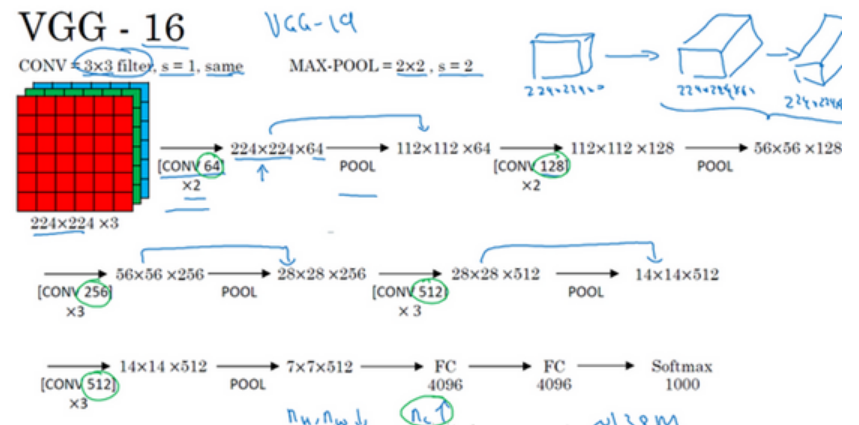

### 创建模型
采用类似于 VGG16 的结构创建模型:
1. 使用固定尺寸的小卷积核 3 x 3
2. 两层卷积搭配一层池化
3. 使用 VGG16 的前三个卷积池化结构：以2的幂次递增卷积核数量 (64, 128, 256)
4. 模型的全连接层没有采用 VGG16 庞大的三层结构（VGG16 的全连接层参数数量占整个模型的90%以上）
5. 卷积层输出直接上 10 分类的 Softmax Classifier

In [48]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=[3,3], padding='same',activation="relu",input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=[3,3], padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='same'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=[3,3], padding='same', activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=[3,3], padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='same'),
    tf.keras.layers.Convolution2D(filters=256, kernel_size=[3,3], padding='same', activation="relu"),
    tf.keras.layers.Convolution2D(filters=256, kernel_size=[3,3], padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation="softmax"),#最后全连接层的输入维度为10
])

In [49]:
# model.build(input_shape=(None,32,32,3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 256)        

In [52]:
#建立模型包括网络，优化器，损失函数
optimizer=tf.keras.optimizers.RMSprop(lr=0.001,rho=0.9,epsilon=1e-8,decay=0.0)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])#metrics可以存储一些训练过程中的我想要的数据
#迭代训练
model.fit(X_train,Y_train,batch_size=100,epochs=10,validation_split=0.1,shuffle=True)
loss,accuracy=model.evaluate(X_test,Y_test)
print('test loss',loss)
print('accuracy',accuracy)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 314s 7ms/sample - loss: 1.6239 - accuracy: 0.4318 - val_loss: 1.4758 - val_accuracy: 0.4904
Epoch 2/10
45000/45000 [==============================] - 312s 7ms/sample - loss: 1.1737 - accuracy: 0.5847 - val_loss: 1.0215 - val_accuracy: 0.6454
Epoch 3/10
45000/45000 [==============================] - 313s 7ms/sample - loss: 0.9287 - accuracy: 0.6765 - val_loss: 0.8907 - val_accuracy: 0.7048
Epoch 4/10
45000/45000 [==============================] - 313s 7ms/sample - loss: 0.7728 - accuracy: 0.7312 - val_loss: 0.6820 - val_accuracy: 0.7668
Epoch 5/10
45000/45000 [==============================] - 313s 7ms/sample - loss: 0.6506 - accuracy: 0.7755 - val_loss: 0.6647 - val_accuracy: 0.7796
Epoch 6/10
45000/45000 [==============================] - 313s 7ms/sample - loss: 0.5587 - accuracy: 0.8048 - val_loss: 0.5744 - val_accuracy: 0.8062
Epoch 7/10
45000/45000 [===========================

test loss 0.5852481331825257
accuracy 0.816


### 4. Optional 

##### Do you want to build a CNN from scratch ? 

In this optianl part, you will build a cnn network step by step.

In [10]:
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2
import numpy as np
np.random.seed(1)

##### 4.1 Implement a convolution step

Hints: Numpy.sum function might be useful.

In [31]:
def conv_single_step(a_prev_slice,W,b):
    '''
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    Arguments:
    a_prev_slice: slice of input data (shape=(f,f,n_C_prev))
    W: Weight parameters contained in a window. (shape = (f,f,n_C_prev))
    b: Bias parameters contained in a window. (shape=(1,1,1))   
    Reutrns:   
    Z: a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data 
    '''
    # Element-wise product
    s = np.multiply(a_prev_slice,W)   
    # Sum over s  
    Z = np.sum(s)
    # Add bias b to z.
    Z = Z + b.astype(float)    
    return Z

In [33]:
np.random.seed(1)
a_prev_slice = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_prev_slice, W, b)
print("Z =", Z)

Z = [[[-6.99908945]]]


Use the code above to test your code. If your c
ode is correct, you should be able to get the output shown as below.

<table>
    <tr>
        <td>
            Z
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

##### 4.2 Padding

Hints: Numpy.pad function might be useful.

In [34]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.   
    Argument:
    X: python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad: integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad: padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), 'constant')
    return X_pad

In [47]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

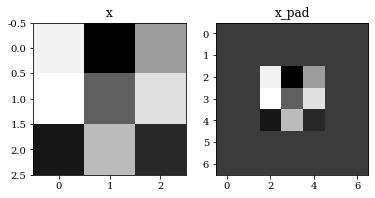

In [36]:
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

##### 4.3 Implement a forward propagation in CNN.

Hints: The formulas to calculate the output shapes are :

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

In [43]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev: output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W: Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b: Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters: python dictionary containing "stride" and "pad"
        
    Returns:
    Z: conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache: cache of values needed for the conv_backward() function
    """
    
    # Get dimensions from A_prev's shape  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get dimensions from W's shape 
    (f, f, n_C_prev, n_C) = W.shape
    
    # Get information from "hparameters" 
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = int((n_H_prev + 2*pad - f)/stride) + 1
    n_W =int((n_W_prev + 2*pad - f)/stride) + 1
    
    # Initialize the output volume Z with zeros. 
    Z = np.zeros([m, n_H, n_W, n_C])
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):                               # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i,:,:,:]             # Select ith training example's padded activation
        for h in range(n_H):                           # loop over vertical axis of the output volume
            for w in range(n_W):                       # loop over horizontal axis of the output volume
                for c in range(n_C):                   # loop over channels (= #filters) of the output volume
                    # Find the vertical start and end of the current "slice" 
                    vert_start = h*stride
                    vert_end = h*stride + f
                    horiz_start = w*stride 
                    horiz_end = w*stride + f
            
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). 
                    a_prev_slice = A_prev_pad[i, vert_start:vert_end, horiz_start:horiz_end,:]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. 
                    weights = W[:, :, :, c]
                    biases = b[:,:,:,c]
                    Z[i, h, w, c] = conv_single_step(a_prev_slice, weights, biases)
                                        
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [44]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Z's mean =
 0.6923608807576933
Z[3,2,1] =
 [-1.28912231  2.27650251  6.61941931  0.95527176  8.25132576  2.31329639
 13.00689405  2.34576051]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


```
Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]
```

##### 4.4 Pooling layers

Hints: As there\'s no padding, the formulas binding the output shape of the pooling to the input shape is:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [45]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev: Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters: python dictionary containing "f" and "stride"
    mode: the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A: output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache: cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Get dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice" 
                    vert_start = h*stride
                    vert_end = h*stride +f
                    horiz_start = w*stride
                    horiz_end = w*stride + f
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. 
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end,c]
                    
                    # Compute the pooling operation on the slice. Use an if statment to differentiate the modes. Use np.max/np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [46]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[1.74481176 0.90159072 1.65980218]
   [1.74481176 1.46210794 1.65980218]
   [1.74481176 1.6924546  1.65980218]]

  [[1.14472371 0.90159072 2.10025514]
   [1.14472371 0.90159072 1.65980218]
   [1.14472371 1.6924546  1.65980218]]

  [[1.13162939 1.51981682 2.18557541]
   [1.13162939 1.51981682 2.18557541]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.19891788 0.84616065 0.82797464]
   [0.69803203 0.84616065 1.2245077 ]
   [0.69803203 1.12141771 1.2245077 ]]

  [[1.96710175 0.84616065 1.27375593]
   [1.96710175 0.84616065 1.23616403]
   [1.62765075 1.12141771 1.2245077 ]]

  [[1.96710175 0.86888616 1.27375593]
   [1.96710175 0.86888616 1.23616403]
   [1.62765075 1.12141771 0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[-3.01046719e-02 -3.24021315e-03 -3.36298859e-01]
   [ 1.43310483e-01  1.93146751e-01 -4.44905196e-01]
   [ 1.28934436e-01  2.22428468e-01  1.25067597e-01]]

  [[-3.81801899e-01  1.59993515e-02  1.70562706e-01]
   [

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.46210794  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.14472371  0.90159072  2.10025514]
   [ 1.14472371  0.90159072  1.65980218]
   [ 1.14472371  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  0.84616065  1.2245077 ]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.84616065  1.27375593]
   [ 1.96710175  0.84616065  1.23616403]
   [ 1.62765075  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.96710175  0.86888616  1.23616403]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ -3.01046719e-02  -3.24021315e-03  -3.36298859e-01]
   [  1.43310483e-01   1.93146751e-01  -4.44905196e-01]
   [  1.28934436e-01   2.22428468e-01   1.25067597e-01]]

  [[ -3.81801899e-01   1.59993515e-02   1.70562706e-01]
   [  4.73707165e-02   2.59244658e-02   9.20338402e-02]
   [  3.97048605e-02   1.57189094e-01   3.45302489e-01]]

  [[ -3.82680519e-01   2.32579951e-01   6.25997903e-01]
   [ -2.47157416e-01  -3.48524998e-04   3.50539717e-01]
   [ -9.52551510e-02   2.68511000e-01   4.66056368e-01]]]


 [[[ -1.73134159e-01   3.23771981e-01  -3.43175716e-01]
   [  3.80634669e-02   7.26706274e-02  -2.30268958e-01]
   [  2.03009393e-02   1.41414785e-01  -1.23158476e-02]]

  [[  4.44976963e-01  -2.61694592e-03  -3.10403073e-01]
   [  5.08114737e-01  -2.34937338e-01  -2.39611830e-01]
   [  1.18726772e-01   1.72552294e-01  -2.21121966e-01]]

  [[  4.29449255e-01   8.44699612e-02  -2.72909051e-01]
   [  6.76351685e-01  -1.20138225e-01  -2.44076712e-01]
   [  1.50774518e-01   2.89111751e-01   1.23238536e-03]]]]
```